In [1]:
import numpy as np
import pandas as pd
from scipy.fft import fft, ifft, fftfreq, fftshift
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from sklearn.preprocessing import normalize
import seaborn as sns

In [2]:
omega = 1
alpha = 1

In [3]:
start = 0
end = 7
ls = 0.01 #sampling frequency should be less than 1/5 time of original signal frequency omega
period = 1
t = np.arange(start, end, ls)
funtion_of_time = np.cos(omega * 2 * np.pi / period * t)
funtion_of_time = np.ones(t.shape[0])

no_of_sample = len(t)

u = np.ones(no_of_sample)
u[np.arange(start, end, ls)<0] = 0

exp_function = np.exp(-1*alpha*t)

sample_freq = fftfreq(no_of_sample, d=ls/period)
pos_mask = np.where(sample_freq > 0)
freqs = sample_freq[pos_mask]

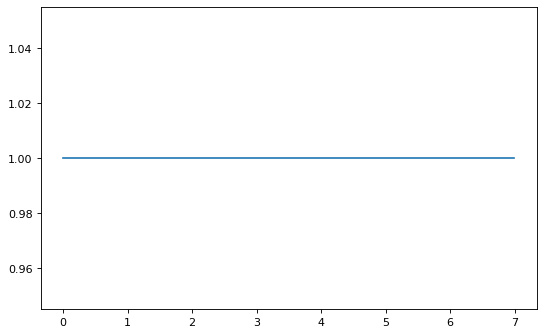

In [4]:
plt.figure(figsize=(8, 5), dpi=80)
plt.plot(t, funtion_of_time);

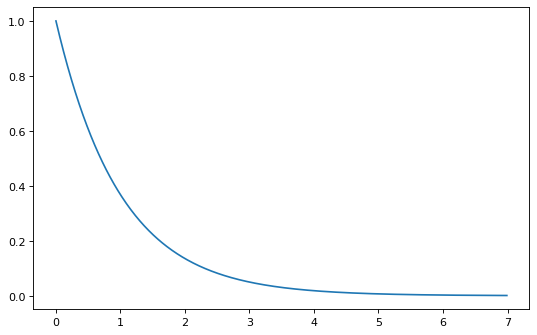

In [5]:
plt.figure(figsize=(8, 5), dpi=80)
plt.plot(t,exp_function)

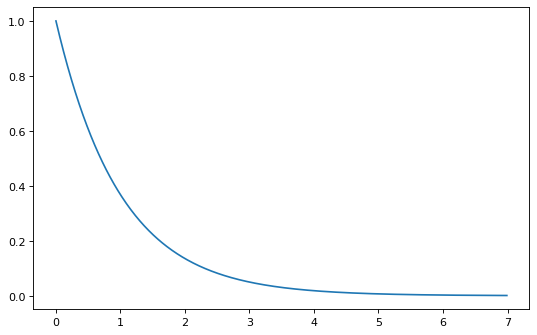

In [6]:
alpha=5
funtion_of_time_laplace = u * exp_function*funtion_of_time
plt.figure(figsize=(8, 5), dpi=80)
plt.plot(t,funtion_of_time_laplace)
plt.show();

In [7]:
ft = fft(funtion_of_time_laplace)
ft_real = ft.real
ft_imag = ft.imag
ft_abs = np.abs(ft)

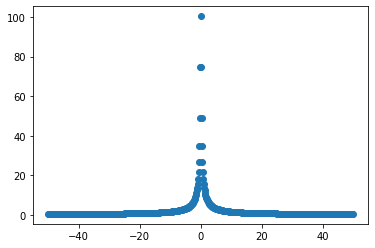

In [8]:
plt.scatter(sample_freq, ft_abs)

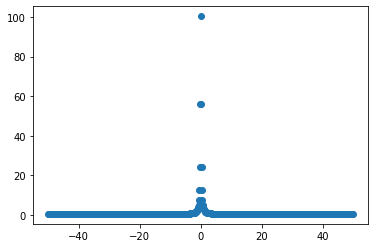

In [9]:
plt.scatter(sample_freq, ft_real)

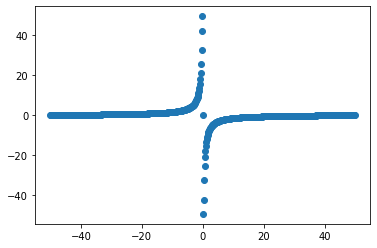

In [10]:
plt.scatter(sample_freq, ft_imag)

In [11]:
alphas = np.arange(2, -2, 0.25)
for i in range(len(alphas)):
    alpha=alphas[i]
    lap = np.exp(alpha*t) * funtion_of_time_laplace
    fft_lap = fft(lap)
    if i == 0:
        lt = fft_lap.reshape(1,-1)
    else:
        lt = np.append(lt, fft_lap.reshape(1,-1), axis=0)

In [12]:
data = np.abs(lt)
normed_data = normalize(data, axis=1, norm='l1')
data = pd.DataFrame(normed_data, columns=["omega"+str(i) for i in sample_freq], index=["alpha"+str(i) for i in alphas])
plt.figure(figsize=(8, 4), dpi=80)
sns.heatmap(data, cmap=cm.coolwarm)
plt.title('Absolute Values', fontsize = 20)
plt.xlabel('omega', fontsize = 15)
plt.ylabel('alpha', fontsize = 15)
plt.show();

NameError: name 'lt' is not defined

Supply & Demand

In [ ]:
alpha=1
omega=1

In [ ]:
s = 1*(alpha + 1j * omega)

In [ ]:
plt.plot(t, np.exp(-1*s*t).imag)

In [ ]:
plt.plot(t, np.exp(-1*s*t).real)

In [ ]:
plt.plot(t, np.exp(-1*s*t).imag, label="imag")
plt.plot(t, np.exp(-1*s*t).real, label="real")
plt.plot(t, np.abs(np.exp(-1*s*t)), label="abs")
plt.legend()
plt.show()